In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("heart.csv")

In [5]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [49]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

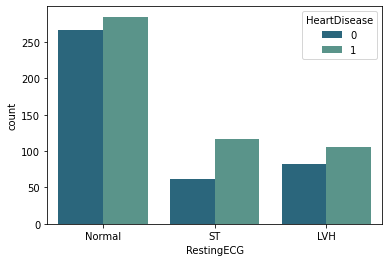

In [51]:
sns.countplot(x='RestingECG',hue = 'HeartDisease',data=df, palette = "crest_r")

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

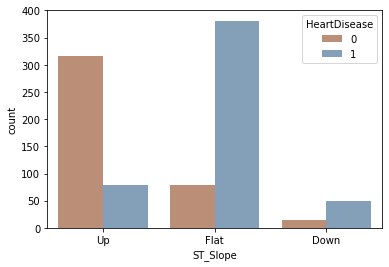

In [53]:
sns.countplot(x='ST_Slope',hue = 'HeartDisease',data=df, palette = "twilight_shifted_r")

<AxesSubplot:xlabel='Sex', ylabel='count'>

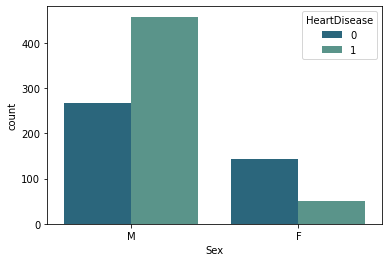

In [48]:
sns.countplot(x='Sex',hue = 'HeartDisease',data=df, palette = "crest_r")

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

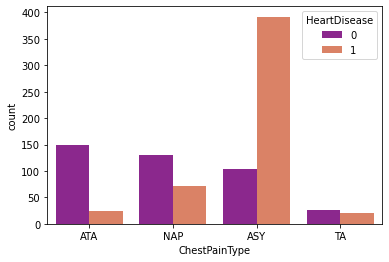

In [46]:
sns.countplot(x='ChestPainType',hue = 'HeartDisease',data=df,palette = "plasma")

In [8]:
list_of_object = list(df.select_dtypes(include="object").columns)
list_of_int = list( df.select_dtypes(exclude="object").columns)

In [9]:
list_of_object

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [10]:
list_of_int

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [11]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [22]:
df = df.copy()

In [23]:
final_df =df.loc[:,~df.columns.duplicated()]

In [24]:
main_df = category_onehot_multcols(list_of_object)

Sex
ChestPainType
RestingECG
ExerciseAngina
ST_Slope


In [30]:
main_df.shape

(918, 16)

In [31]:
df_train = final_df.iloc[:500,:]

In [32]:
df_test = final_df.iloc[501:,:]

In [33]:
df_test.drop(["HeartDisease"],axis = 1, inplace = True)

C:\Users\sachin.khewadiya\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
X_train=df_train.drop(['HeartDisease'],axis=1)
y_train=df_train['HeartDisease']

In [35]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred=classifier.predict(df_test)

In [37]:
y_pred

array([ 0.0625347 ,  0.9898923 , -0.15290849,  0.9160529 ,  0.9925016 ,
        0.87876725, -0.22059976,  1.2329332 ,  0.1088094 , -0.03456064,
        1.0325943 ,  0.0247003 ,  0.5710785 ,  0.9301412 ,  0.7930414 ,
        0.7417533 ,  0.9052049 ,  0.9337332 ,  0.5911389 ,  0.32473242,
        0.7089556 ,  0.8955602 ,  0.79210734,  0.12076005, -0.08467597,
        0.6994525 ,  0.333598  ,  0.9180679 ,  0.8165081 ,  1.0243335 ,
        1.1215158 ,  0.68129677,  0.38542917,  1.1462481 ,  0.83083415,
        1.094765  ,  0.956494  ,  1.0034581 ,  0.03513301,  0.9398459 ,
        0.940411  ,  0.9740873 ,  0.8675292 ,  0.61743665, -0.01193895,
        0.01855915,  0.9138802 ,  0.3351826 ,  0.5548532 ,  0.9491511 ,
       -0.00166411,  0.84234935,  0.9068704 ,  0.10244045,  0.2040756 ,
        0.7612386 ,  0.96133786,  0.95817506,  0.9270716 ,  0.09647454,
        0.14242058,  0.40659383,  0.979915  ,  0.7842528 ,  0.82726884,
        0.946414  ,  0.82108265,  1.2737093 ,  0.9250093 ,  0.98

In [38]:
#  find the accuracy of the model.
accuracy = classifier.score(X_train,y_train)
print(accuracy*100,'%')

99.90415281668731 %
